# Importing Dependies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer#Test data into numeric data with more meaning ful information
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn import feature_extraction

# Data Collection & Pre-Processing

In [2]:
#loading the data from csv file using pandas library
mail_data=pd.read_csv("/home/hacker/pro/spam/spam_ham_dataset.csv")


In [3]:
mail_data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [4]:
#finding missing values
mail_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [5]:
#Cheaking the number of the rows and columns
mail_data.shape

(5171, 4)

In [6]:
X=mail_data['text']
Y=mail_data['label_num']

In [7]:
X

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 5171, dtype: object

In [8]:
Y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: label_num, Length: 5171, dtype: int64

In [9]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=3)

In [10]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5171,)
(4136,)
(1035,)


# Feature Extraction

In [11]:
#Transform text data to feature vectors that can be used as input to the logistic regression
feature_extr=TfidfVectorizer(min_df=1,stop_words="english",lowercase=True)
X_train_fea=feature_extr.fit_transform(X_train)
X_test_fea=feature_extr.transform(X_test)
#convertin Y_train ad Y_test values as integers
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')


In [12]:
print(X_train)

2209    Subject: hplc to wellhead\r\ndaren here is the...
2000    Subject: mobil chemical - hpl meter # 1256 - e...
5030    Subject: revised nom 5 / 5 - eastrans ; revise...
1376    Subject: re : exxon company , usa global # 960...
1564    Subject: your pharmacy nx\r\nwant a cheap pain...
                              ...                        
789     Subject: incr ' ease yo ' ur man ' hood by 4 -...
968     Subject: subscribers receive first notice on r...
1667    Subject: neon for march 28\r\nhere is the neon...
3321    Subject: re : first delivery - pure resources ...
1688    Subject: enhance your chest size\r\nemail is l...
Name: text, Length: 4136, dtype: object


In [13]:
print(X_train_fea)

  (0, 3871)	0.13387711316973605
  (0, 531)	0.14556222812251965
  (0, 30451)	0.08468916670398006
  (0, 43273)	0.14556222812251965
  (0, 3890)	0.14556222812251965
  (0, 548)	0.14556222812251965
  (0, 37262)	0.11275796314501375
  (0, 2908)	0.11535664415295803
  (0, 456)	0.14556222812251965
  (0, 26297)	0.09506000151609588
  (0, 36190)	0.11400727959297849
  (0, 2478)	0.13872687405852518
  (0, 521)	0.14556222812251965
  (0, 16808)	0.11843023142166303
  (0, 22041)	0.13387711316973605
  (0, 2706)	0.14556222812251965
  (0, 522)	0.14556222812251965
  (0, 32060)	0.07311834410351342
  (0, 19411)	0.04211028825505044
  (0, 2537)	0.13872687405852518
  (0, 517)	0.14556222812251965
  (0, 19429)	0.14556222812251965
  (0, 16637)	0.24438399643390496
  (0, 3875)	0.14556222812251965
  (0, 836)	0.14556222812251965
  :	:
  (4135, 8873)	0.07154271542163933
  (4135, 16161)	0.07327358549803296
  (4135, 26936)	0.07154271542163933
  (4135, 15691)	0.07812310961344454
  (4135, 14167)	0.07812310961344454
  (4135, 11

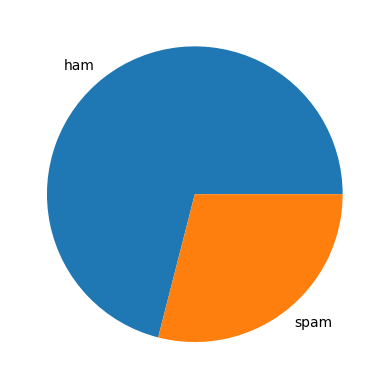

In [28]:
#Data visulaization
import seaborn as sns
import matplotlib.pyplot as plt
plt.pie(x=[mail_data['label_num'].value_counts()[0],mail_data['label_num'].value_counts()[1]],labels=['ham','spam'])
plt.show()

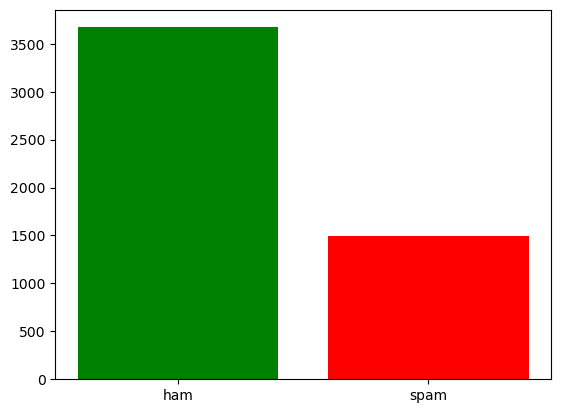

In [42]:
plt.bar(x=['ham','spam'],height=[mail_data['label_num'].value_counts()[0],mail_data['label_num'].value_counts()[1]],color=['green','red'])
plt.show()

# Training Model

In [14]:
model=LogisticRegression()
model.fit(X_train_fea,Y_train)

LogisticRegression()

# Model Evaluation

In [62]:
# Evaluation traing data
predict=model.predict(X_train_fea)
ac=accuracy_score(predict,Y_train)
pr=precision_score(predict,Y_train)
cm=confusion_matrix(predict,Y_train)
rc=recall_score(predict,Y_train)
print("Accuracy Score   : ",ac)
print("Precision Score  : ",pr)
print("Confusion Matrix : \n",cm)
print("Recall Score     : ",rc)

Accuracy Score   :  0.9970986460348162
Precision Score  :  0.9991617770326907
Confusion Matrix : 
 [[2932    1]
 [  11 1192]]
Recall Score     :  0.9908561928512053


In [64]:
# Model Evaluation on test  data
predict=model.predict(X_test_fea)
ac=accuracy_score(predict,Y_test)
pr=precision_score(predict,Y_test)
cm=confusion_matrix(predict,Y_test)
rc=recall_score(predict,Y_test)
print("Accuracy Score   : ",ac)
print("Precision Score  : ",pr)
print("Confusion Matrix : \n",cm)
print("Recall Score     : ",rc)

Accuracy Score   :  0.9806763285024155
Precision Score  :  0.9869281045751634
Confusion Matrix : 
 [[713   4]
 [ 16 302]]
Recall Score     :  0.949685534591195


# Prediction

In [46]:
input_mail=["Subject: report 01405 !"]
transforming=feature_extr.transform(input_mail)
result=model.predict(transforming)
if result==0 : 
    print("This message ham mail you don't worry about this")
elif result==1:
    print("This message is spam mail be careful.")

This message is spam mail be careful.
